Step 1: Import Necessary Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Load the Dataset: Load both student-mat.csv and student-por.csv into separate DataFrames.

In [2]:
# Load datasets
math_data = pd.read_csv('student-mat.csv', sep=';')
por_data = pd.read_csv('student-por.csv', sep=';')


Preview the Data:

In [3]:
# Display first few rows
print(math_data.head())
print(por_data.head())


  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     G

Check for Missing Values and Data Types

In [4]:
# Check data info
print(math_data.info())
print(por_data.info())

# Check for missing values
print(math_data.isnull().sum())
print(por_data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

Basic Statistics

In [5]:
# Summary statistics
print(math_data.describe())
print(por_data.describe())


              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.9988

Check Unique Values for Categorical Columns

In [6]:
# Check unique values for categorical columns
print(math_data['school'].unique())
print(math_data['sex'].unique())


['GP' 'MS']
['F' 'M']


Step 2: Data Cleaning and Preprocessing

Objective for This Step:
Ensure data is clean, consistent, and ready for analysis.
Identify features that might be useful for predicting the target (G3).
Handle categorical data for machine learning readiness.

In [7]:
#Check for Missing Values# Check for missing values
print(math_data.isnull().sum())
print(por_data.isnull().sum())



school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health     

In [10]:
# Example: Filling missing numerical values in 'age' column
math_data['age'].fillna(math_data['age'].mean(), inplace=True)

# Example: Filling missing categorical values in 'school' column
math_data['school'].fillna(math_data['school'].mode()[0], inplace=True)


2. Handle Duplicates

In [11]:
# Check for duplicates
print(math_data.duplicated().sum())

# Drop duplicates
math_data = math_data.drop_duplicates()


0


3. Convert Categorical Columns

In [12]:
# Example: Convert 'sex' column to numeric (F=0, M=1)
math_data['sex'] = math_data['sex'].map({'F': 0, 'M': 1})


4. Create a Correlation Matrix


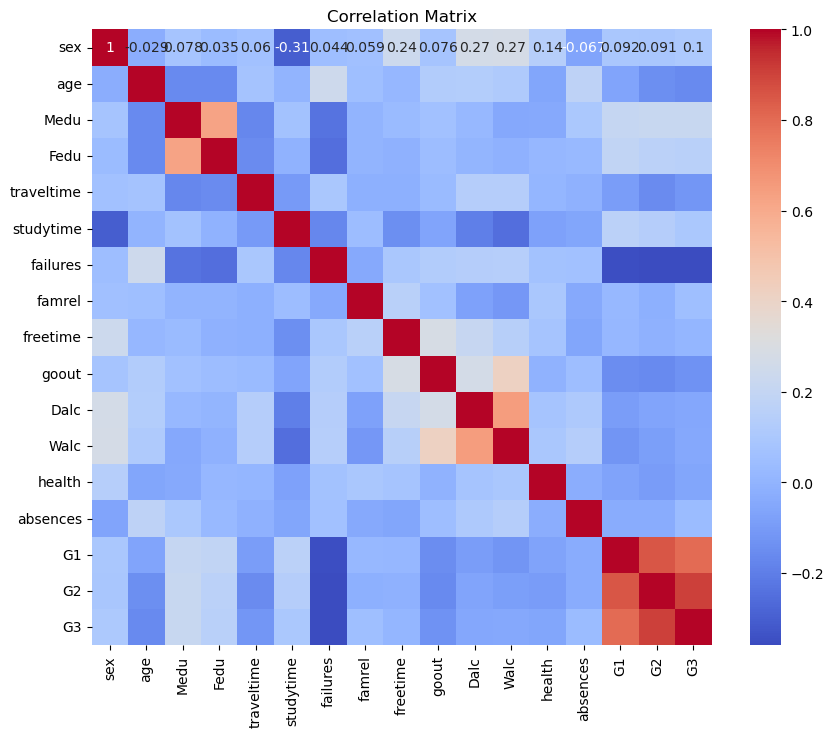

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure only numerical columns are used for correlation
numerical_data = math_data.select_dtypes(include=['float64', 'int64'])

# Handle missing values if needed
numerical_data.fillna(0, inplace=True)

# Generate correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Step 4: Exploratory Data Analysis (EDA)


C:\Users\Abbas Anwar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


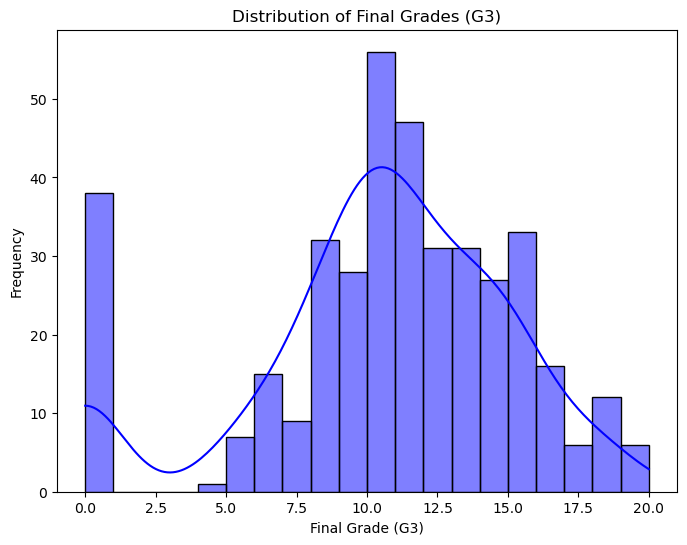

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(math_data['G3'], bins=20, kde=True, color='blue')
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Frequency')
plt.show()


2. Analyze Relationships Between Key Features and Target (G3)
Visualize how key features (e.g., studytime, absences, failures) relate to G3.
Example: Study Time vs. Final Grade

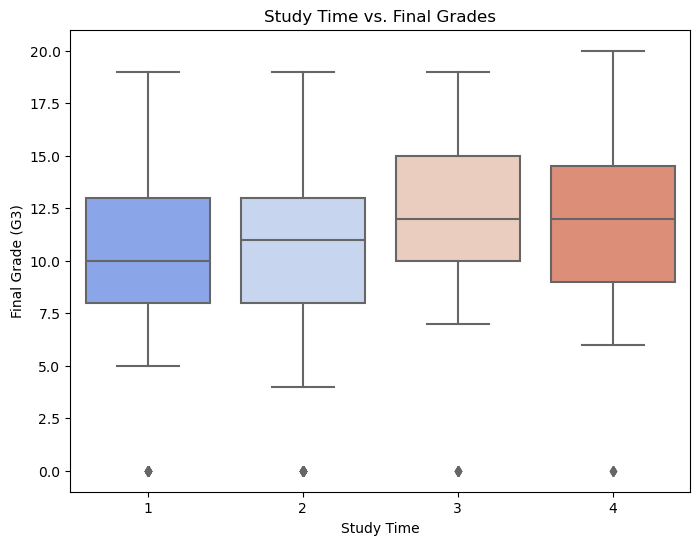

In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='studytime', y='G3', data=math_data, palette='coolwarm')
plt.title('Study Time vs. Final Grades')
plt.xlabel('Study Time')
plt.ylabel('Final Grade (G3)')
plt.show()


Example: Number of Absences vs. Final Grade 

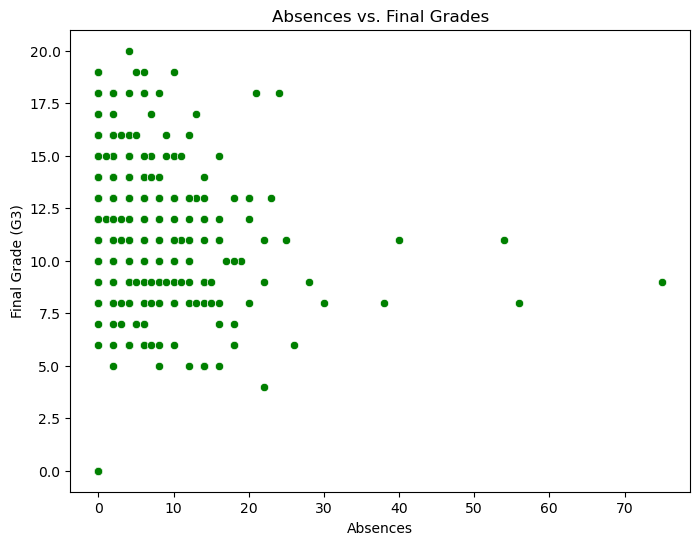

In [20]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='absences', y='G3', data=math_data, color='green')
plt.title('Absences vs. Final Grades')
plt.xlabel('Absences')
plt.ylabel('Final Grade (G3)')
plt.show()


4. Feature Importance Using Correlation

In [21]:
correlation = math_data.corr()
target_corr = correlation['G3'].sort_values(ascending=False)
print("Top Features Correlated with G3:\n", target_corr.head(10))

ValueError: could not convert string to float: 'GP'